Cálculo Variacional de Estado Fundamental Hidrógeno 

In [190]:
from numpy import  linspace, zeros, array, pi, exp, sqrt
from scipy.linalg import  eigh , eigvalsh
import sympy as sp
from scipy.special import hyp1f1
from math import factorial
from sympy import oo
import random as rd
#sp.init_printing()

from __future__ import division


%matplotlib inline
from matplotlib.pyplot import plot, title, legend, show, axhline, \
                              xlabel, ylabel, axis, figure

In [226]:
nsize = 8
S = zeros((nsize,nsize))
H = zeros((nsize,nsize))
Alpha = zeros((nsize))
Ci = zeros((nsize))

In [227]:
# Datos Iniciales para variacional
Alpha[0] = 13.00773
Alpha[1] = 1.962079
Alpha[2] = 0.444529
Alpha[3] = 0.1219492
Alpha[4] = 0.1
Alpha[5] = 0.05
Alpha[6] = 0.02
Alpha[7] = 0.01
#rd.seed(a=1.4)
#Alpha = array([10*rd.random() for i in range(nsize)])
#print Alpha

In [228]:
# Cálculo de Overlaps  Sij=<xi|xj>

def overlap(Alpha,p,q):
    spq = ( pi / (Alpha[p] + Alpha[q]) )**(3./2.)
    
    return spq

for i in range(0,nsize):
    for j in range(i,nsize):        
        S[i,j]=overlap(Alpha,i,j)
        S[j,i]=S[i,j]


In [120]:
S

array([[4.19640644e-02, 9.61391815e-02, 1.12857904e-01, 1.17042513e-01,
        1.17336621e-01, 1.18011215e-01, 1.18419081e-01, 1.18555558e-01],
       [9.61391815e-02, 7.16316708e-01, 1.49147774e+00, 1.85084232e+00,
        1.88047195e+00, 1.95099999e+00, 1.99546157e+00, 2.01065865e+00],
       [1.12857904e-01, 1.49147774e+00, 6.64247101e+00, 1.30602054e+01,
        1.38577681e+01, 1.60116896e+01, 1.75875588e+01, 1.81711500e+01],
       [1.17042513e-01, 1.85084232e+00, 1.30602054e+01, 4.62286682e+01,
        5.32530435e+01, 7.80952410e+01, 1.04117896e+02, 1.16175531e+02],
       [1.17336621e-01, 1.88047195e+00, 1.38577681e+01, 5.32530435e+01,
        6.22557996e+01, 9.58490738e+01, 1.33953153e+02, 1.52628551e+02],
       [1.18011215e-01, 1.95099999e+00, 1.60116896e+01, 7.80952410e+01,
        9.58490738e+01, 1.76085992e+02, 3.00661451e+02, 3.78876731e+02],
       [1.18419081e-01, 1.99546157e+00, 1.75875588e+01, 1.04117896e+02,
        1.33953153e+02, 3.00661451e+02, 6.96041000e+02, 1.

In [78]:
aj = sp.Symbol("aj",positive=True)
ai = sp.Symbol("ai",positive=True)
r = sp.Symbol("r",positive=True)

# Integral de overlap

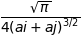

In [34]:
sp.simplify(sp.integrate(sp.exp(-aj*r**2)*sp.exp(-ai*r**2)*r**2,(r,0,oo)))

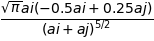

In [35]:
sp.simplify(sp.integrate(sp.exp(-aj*r**2)*(-0.5)*sp.diff(sp.exp(-ai*r**2),r,2)*r**2,(r,0,oo)))

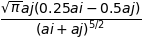

In [36]:
sp.simplify(sp.integrate(sp.exp(-ai*r**2)*(-0.5)*sp.diff(sp.exp(-aj*r**2),r,2)*r**2,(r,0,oo)))

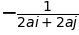

In [37]:
sp.simplify(sp.integrate(-sp.exp(-aj*r**2)*sp.exp(-ai*r**2)*r,(r,0,oo)))

In [229]:
 # Cálculo de Hamiltoniano Hij=<xi| H |xj>


# Cálculo de Energía Cinética  Tij=<xi|-1/2 D^2 |xj>
def Tkin(Alpha,p,q):
    rnum = 3 * pi**(3./2.) * Alpha[p] * Alpha[q]
    rden =  (Alpha[p] + Alpha[q] )**(5./2.)    
    Tpq = rnum/rden    
    return Tpq


# Cálculo de Energía Potencial  Vij=<xi|-Z/r |xj>
def Vpot(Alpha,p,q):
    Vpq =  ( -2*pi )  /  (Alpha[p] + Alpha[q])    
    return Vpq

for i in range(0,nsize):
    for j in range(i,nsize): 
        H[i,j]=Tkin(Alpha,i,j) + Vpot(Alpha,i,j)
        H[j,i]=H[i,j]
   

In [230]:
H

array([[ 5.77268466e-01,  7.20024669e-02, -3.21540499e-01,
        -4.36126263e-01, -4.44417178e-01, -4.63551215e-01,
        -4.75198941e-01, -4.79109733e-01],
       [ 7.20024669e-02,  5.07049929e-01, -9.89184826e-01,
        -2.37741992e+00, -2.51023115e+00, -2.83735524e+00,
        -3.05147782e+00, -3.12605792e+00],
       [-3.21540499e-01, -9.89184826e-01, -2.63808243e+00,
        -7.34221693e+00, -8.14489471e+00, -1.05464720e+01,
        -1.25161067e+01, -1.32903670e+01],
       [-4.36126263e-01, -2.37741992e+00, -7.34221693e+00,
        -1.73051627e+01, -1.95312058e+01, -2.82329751e+01,
        -3.88967297e+01, -4.43970855e+01],
       [-4.44417178e-01, -2.51023115e+00, -8.14489471e+00,
        -1.95312058e+01, -2.20775566e+01, -3.23029947e+01,
        -4.56622199e+01, -5.29572696e+01],
       [-4.63551215e-01, -2.83735524e+00, -1.05464720e+01,
        -2.82329751e+01, -3.23029947e+01, -4.96254037e+01,
        -7.68742993e+01, -9.52478368e+01],
       [-4.75198941e-01, -3.051477

In [231]:
# Solución generalized eigenvalues (H-ES)(C)=0
# Sólo Autovalores !

Ener = eigvalsh(H,S,type=1)
Ener

array([-0.4994118 , -0.12491848, -0.05300045,  0.02678946,  0.2458299 ,
        0.79722314,  3.24652829, 21.6695907 ])

In [232]:
Ener[0], Ener[1]

In [233]:
def R1F1(n,l,z,r):
    rho = 2 * r * z / n
    rnum = (2 * z / n)**3 * factorial(n + l)
    rden = (factorial(2*l+1))**2 * 2*n * factorial(n-l-1)
    rnorm = sqrt(rnum/rden)
    rfunc = (rho)**l * exp(-rho/2) * hyp1f1(-n+l+1, 2*l+2, rho)
    R = rnorm * rfunc
    return R

In [234]:
# Solución generalized eigenvalues (H-ES)(C)=0

Ener,coef = eigh(H,S,type=1)


In [235]:
def psi(Ci,Alpha,x):
    from math import  exp
    nsize = len(Ci) 
    sum = 0.0
    for i in range(0,nsize):
        sum = sum + Ci[i]*exp(-Alpha[i]*x**2)
    return sum

In [236]:
# array definitions
npts = 100
xmin=0.0
xmax=4.0
x = linspace(xmin,xmax,npts)
wave1s = zeros(npts)
wave2s = zeros(npts)

In [237]:
C0 = coef[:,0]
for i in range(0,npts):
        wave1s[i] = psi(-C0,Alpha,x[i])


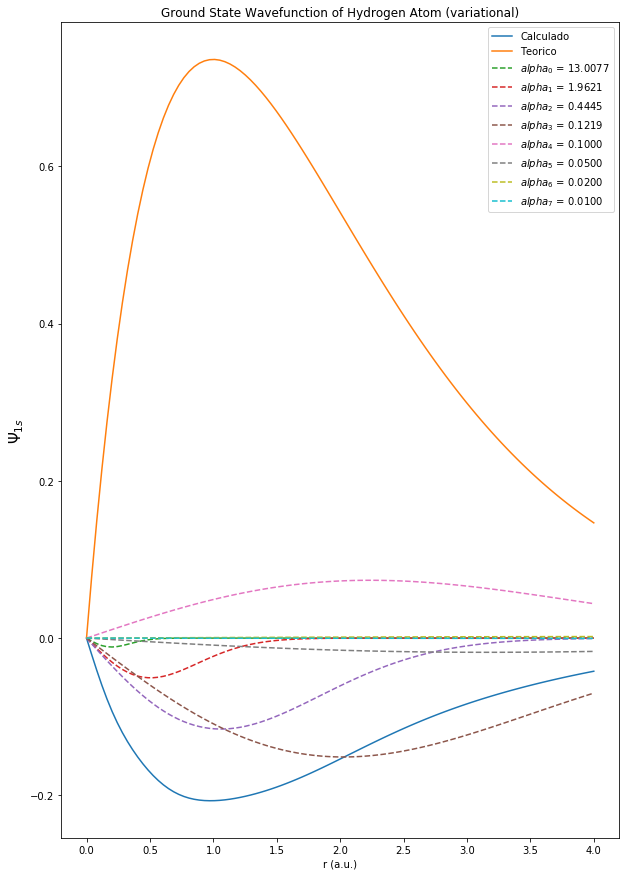

In [251]:
figure(figsize=(10,15))
plot(x,x*wave1s, label = 'Calculado');
#axis([xmin,xmax,0,0.6]);
plot(x,x*R1F1(1,0,1,x),label = 'Teorico')
title("Ground State Wavefunction of Hydrogen Atom (variational)");
xlabel("r (a.u.)");
ylabel("$\Psi_{1s}$",size=15);
for i in range(nsize):
    plot(x,x*(-C0[i])*exp(-Alpha[i]*x**2), label = '$alpha_{:d}$ = {:.4f}'.format(i,Alpha[i]), linestyle='dashed')
legend(loc='best')

In [242]:
C1 = coef[:,1]
for i in range(0,npts):
        wave2s[i] = psi(-C1,Alpha,x[i])

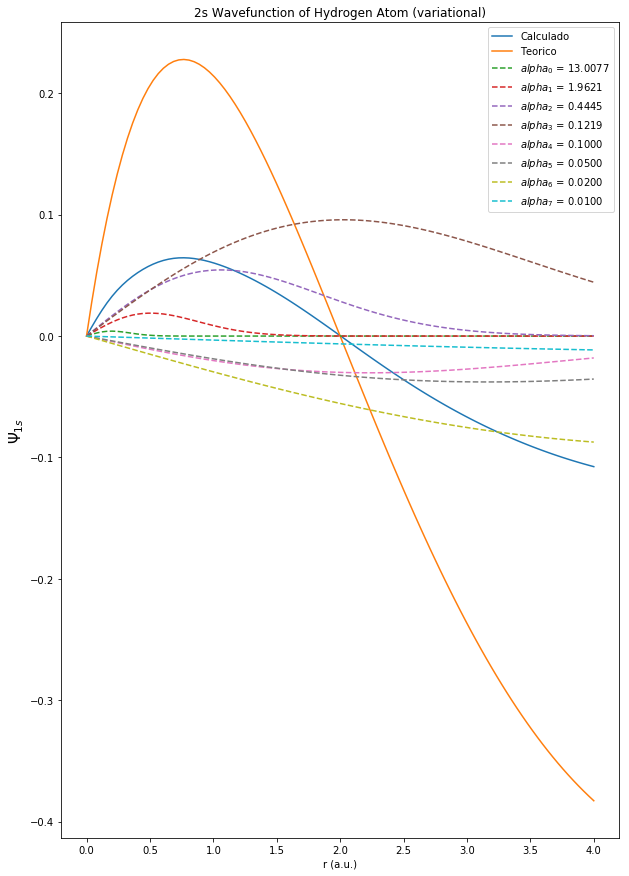

In [244]:
figure(figsize=(10,15))
plot(x,x*wave2s, label = 'Calculado');
plot(x,x*R1F1(2,0,1,x),label = 'Teorico')

#axis([xmin,xmax,0,0.6]);
title("2s Wavefunction of Hydrogen Atom (variational)");
xlabel("r (a.u.)");
ylabel("$\Psi_{1s}$",size=15);
for i in range(nsize):
    plot(x,x*(-C1[i])*exp(-Alpha[i]*x**2), label = '$alpha_{:d}$ = {:.4f}'.format(i,Alpha[i]), linestyle='dashed')
legend(loc='best')